In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [ ]:
#Метрика качества
#ACC, PRE, REC, метрика F1, AUC

In [ ]:
import torch
x = torch.Tensor([1.,2.,3.,4.,],)
x.requires_grad = True
print(x)
x = torch.Tensor([1.,2.,3.,4.,],)
print(x)
print(torch.zeros([2, 3]))
print(torch.ones([2, 3]))
print(x.size())
print(x.shape)
x.dtype
y = x
y *= 2
print(x)
z = x.clone()
z *= 2
z += 1
print(x, z)

tensor([1., 2., 3., 4.], requires_grad=True)
tensor([1., 2., 3., 4.])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
torch.Size([4])
torch.Size([4])
tensor([2., 4., 6., 8.])
tensor([2., 4., 6., 8.]) tensor([ 5.,  9., 13., 17.])


tensor([[9.9525e-05]], requires_grad=True) 1145


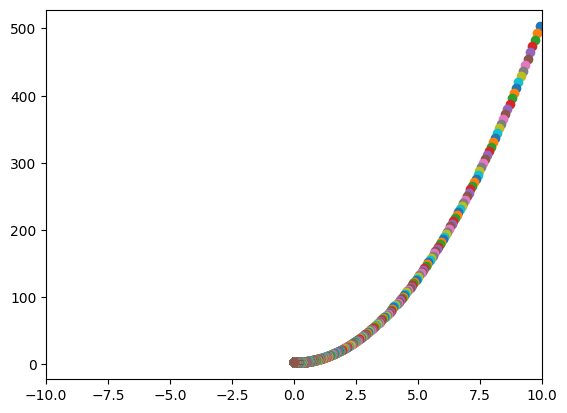

In [ ]:
#Метод градиентного списка
w = torch.tensor([[10.0]], requires_grad=True)
#w.data[0] = np.random.rand() * 10
alpha = 1e-3
for step in range(1500):
  function = 5 * (w[0]) ** 2  + 3
  function.backward()
  w.data = w.data - alpha * w.grad
  plt.scatter(w.data, function.detach().numpy())
  w.grad.zero_()
  if abs(w.data[0] - 0) < 1e-4:
    break
print(w, step)
plt.xlim(-10, 10)
plt.show()

In [ ]:
w = torch.tensor([[10.0], [9.0]], requires_grad=True)
# w.data[0] = np.random.rand()*10
alpha = 0.1

for step in range(10000):
  function = 5*(w[0])**2 + 7*(w[1]-3)**2 + 4
  function.backward()
  w.data = w.data - alpha*w.grad
  w.grad.zero_()
  if abs(w.data[0] - 0) < 1e-4 and abs(w.data[1] - 3) < 1e-4:
    break

print(w, step)

tensor([[0.0000],
        [3.0000]], requires_grad=True) 12


In [ ]:
w = torch.tensor([[10.0], [9.0]], requires_grad=True)
alpha = 10e-2
optimizer = torch.optim.Adam([w], lr=alpha)

for step in range(1000):
  function = 5*(w[0])**2 + 7*(w[1]-3)**2 + 4
  function.backward()
  optimizer.step()
  optimizer.zero_grad()
  if abs(w.data[0] - 0) < 1e-4 and abs(w.data[1] - 3) < 1e-4:
    break
print(w, step)

tensor([[9.4944e-05],
        [3.0000e+00]], requires_grad=True) 337


In [ ]:
w = torch.tensor([[10.0], [9.0]], requires_grad=True)
alpha = 10e-2
optimizer = torch.optim.SGD([w], lr=alpha)

for step in range(1000):
  function = 5*(w[0])**2 + 7*(w[1]-3)**2 + 4
  function.backward()
  optimizer.step()
  optimizer.zero_grad()
  if abs(w.data[0] - 0) < 1e-4 and abs(w.data[1] - 3) < 1e-4:
    break
print(w, step)

tensor([[0.0000],
        [3.0000]], requires_grad=True) 12


In [ ]:
w = torch.tensor([[10.0], [9.0]], requires_grad=True)
alpha = 1e-2
optimizer = torch.optim.ASGD([w], lr=alpha)

for step in range(1000):
  function = 5*(w[0])**2 + 7*(w[1]-3)**2 + 4
  function.backward()
  optimizer.step()
  optimizer.zero_grad()
  if abs(w.data[0] - 0) < 1e-4 and abs(w.data[1] - 3) < 1e-4:
    break
print(w, step)

tensor([[9.2649e-05],
        [3.0000e+00]], requires_grad=True) 109


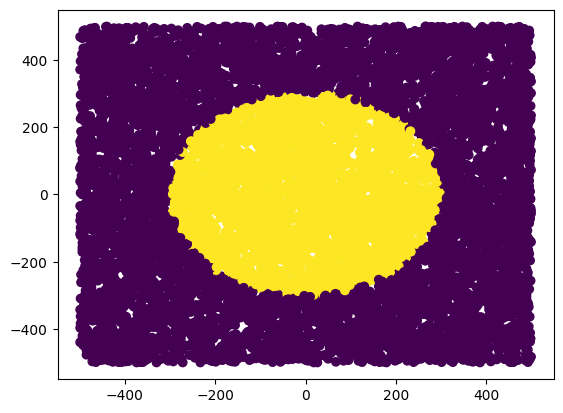

In [ ]:
f=open('res_oval.dat')
d=[]
for s in f:
 d.append([float(x) for x in s.split()])
d=np.array(d)
plt.scatter(d[:,0],d[:,1],c=d[:,2])
plt.show()

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (2, )))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

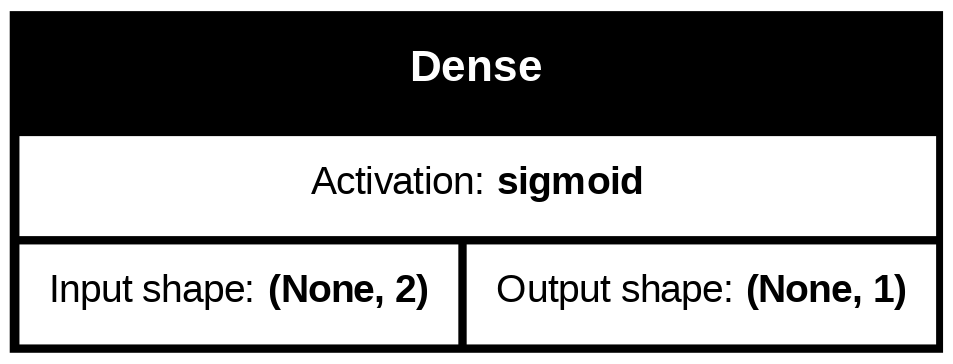

In [ ]:
tf.keras.utils.plot_model(model, show_layer_activations = True, show_shapes = True)

In [ ]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(d[:, :2], d[:,2], epochs=100)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4861 - loss: 90.8300
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4988 - loss: 84.0550
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5016 - loss: 79.8534
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4933 - loss: 85.1947
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5031 - loss: 82.0262
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4882 - loss: 85.0669
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4948 - loss: 87.5149
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5014 - loss: 80.4232
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4967 - loss: 85.3313
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4965 - loss: 84.8986
Epoch 11/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4974 - loss: 83.3266
Epoch 12/100
313/313 ━━━━━━━━━

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


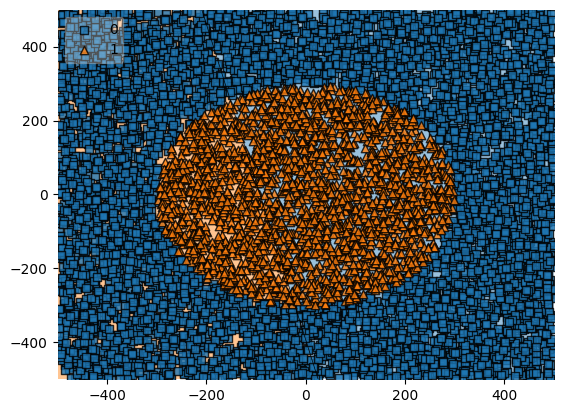

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(d[:, :2], d[:, 2].astype(int), clf = model, legend = 2)
plt.show()